# **EDA**


**1-) Temel Veri Analizi**

Bu aşamada veriyi anlamak için grafiklere başlamadan önce yapacağımız şeyler:

Veriyi yüklemek ve genel bilgi almak

Satır/sütun sayısı

Sütun tipleri (int, float, object)

İlk birkaç gözlem

Sayısal değişkenlerin özet istatistiği

Ortalama, medyan, min, max, standart sapma

Kategorik değişkenlerin benzersiz değer sayısı

Kaç farklı kategori var?

Eksik değer analizi

Hangi sütunda eksik var?

Eksik yüzdesi ne kadar?

Aykırı değerlerin temel kontrolü (sayısal veriler için)

Şimdilik sayısal özet ile hangi değişkenlerde uç değer olabileceğine bakıyoruz

Boxplot henüz yok, sadece sayısal kontroller

Amaç: Veriyi ve potansiyel problemleri anlamak, hangi sütunlarda görselleştirme ve detaylı inceleme yapılacağına karar vermek.

In [1]:
# =====================================
#  AŞAMA 1: TEMEL VERİ ANALİZİ
# =====================================

import pandas as pd

# -------------------------------
# 0️⃣ Google Drive'ı Bağlama
# -------------------------------
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# 1️⃣ Dosya Yolu ve Veri Yükleme
# -------------------------------
file_path = "/content/drive/MyDrive/Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(file_path)

print("="*50)
print("1️⃣ AŞAMA 1 – TEMEL VERİ ANALİZİ")
print("="*50)

# -------------------------------
# Genel Bilgi
# -------------------------------
print("\n===== Genel Bilgi =====")
print("Veri boyutu (satır, sütun):", df.shape)
print("\nSütun tipleri ve eksik değerler:")
print(df.info())
print("\nİlk 5 gözlem:")
print(df.head())

# -------------------------------
# Sayısal Değişken Özetleri
# -------------------------------
print("\n===== Sayısal Değişken Özetleri =====")
print(df.describe().T)

# -------------------------------
# Kategorik Değişkenlerin Benzersiz Değer Sayısı
# -------------------------------
print("\n===== Kategorik Değişkenlerin Benzersiz Değer Sayısı =====")
print(df.nunique())

# -------------------------------
# Eksik Değer Analizi
# -------------------------------
print("\n===== Eksik Değer Analizi =====")
missing_count = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({"Eksik_Sayisi": missing_count, "Eksik_Yuzdesi (%)": missing_percent})
print(missing_df)

# -------------------------------
# Aykırı Değer Ön Kontrolü
# -------------------------------
print("\n===== Aykırı Değer Ön Kontrolü =====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"{col} için aykırı değer sayısı: {outliers.shape[0]}")

print("\n✅ AŞAMA 1 tamamlandı. Artık veriyi temel olarak analiz ettik.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1️⃣ AŞAMA 1 – TEMEL VERİ ANALİZİ

===== Genel Bilgi =====
Veri boyutu (satır, sütun): (2235, 13)

Sütun tipleri ve eksik değerler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12

**2-) Görselleştirme (Detaylı Analiz)**

2.aşamadaki grafikler isteğe bağlı, daha çok veri keşfi ve modelleme öncesi karar için kullanılır.

2️⃣ AŞAMA 2 – GÖRSEL ANALİZ (OKUNAKLI GRAFİKLER)

===== 1️⃣ Sayısal Değişkenlerin Dağılımları =====


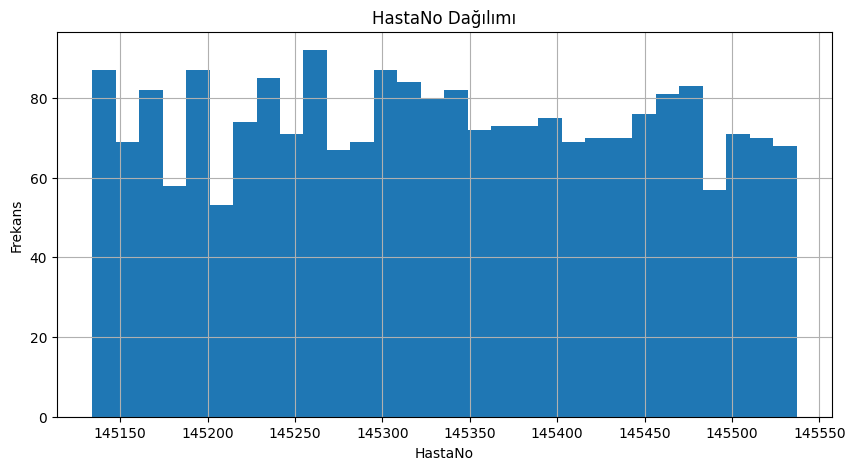

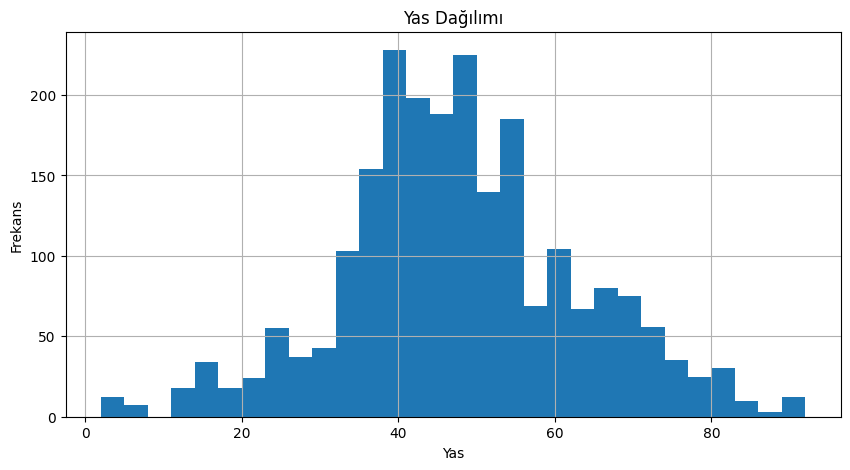


===== 2️⃣ Sayısal Değişkenlerde Boxplot =====


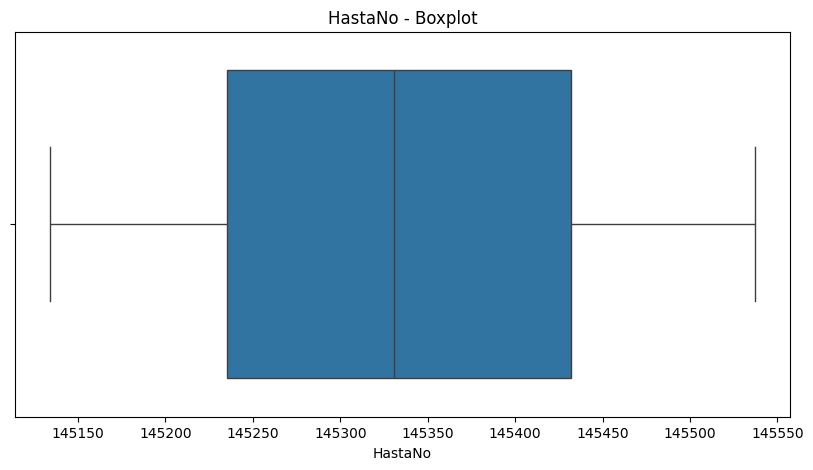

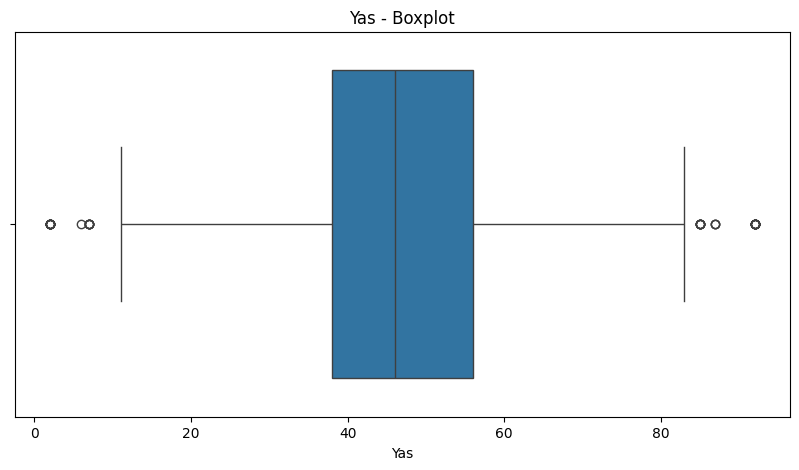


===== 3️⃣ Kategorik Değişken Dağılımları =====


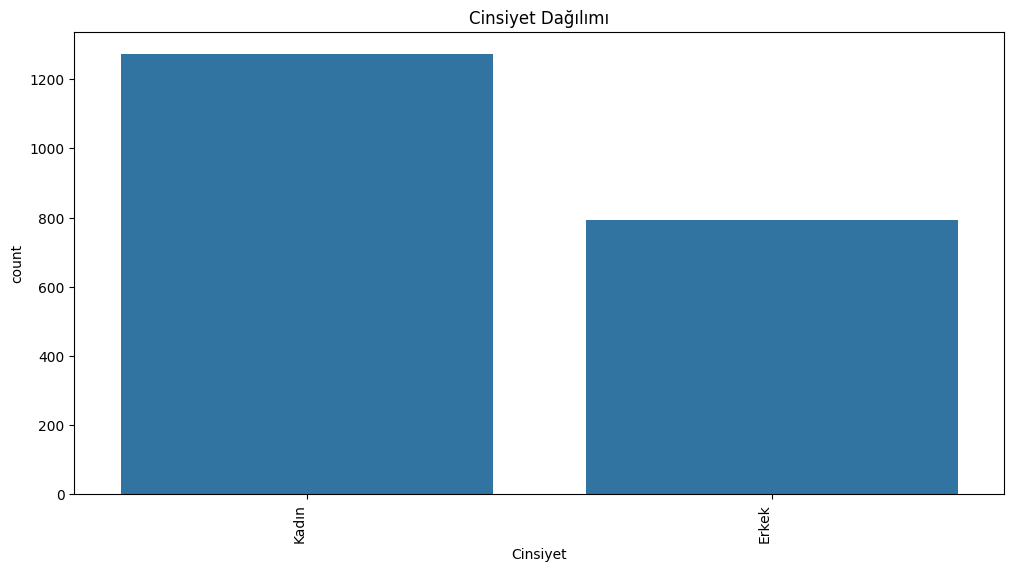

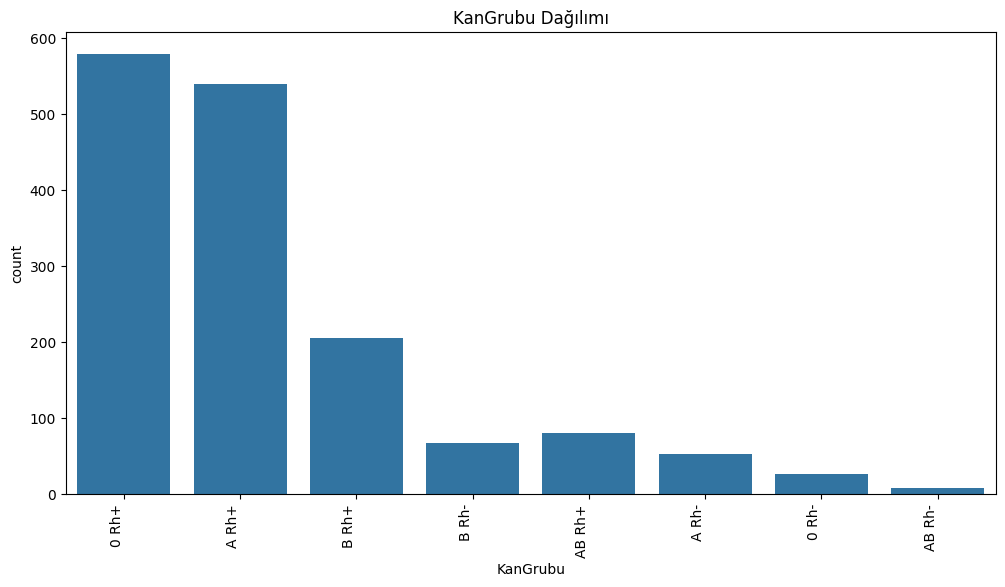

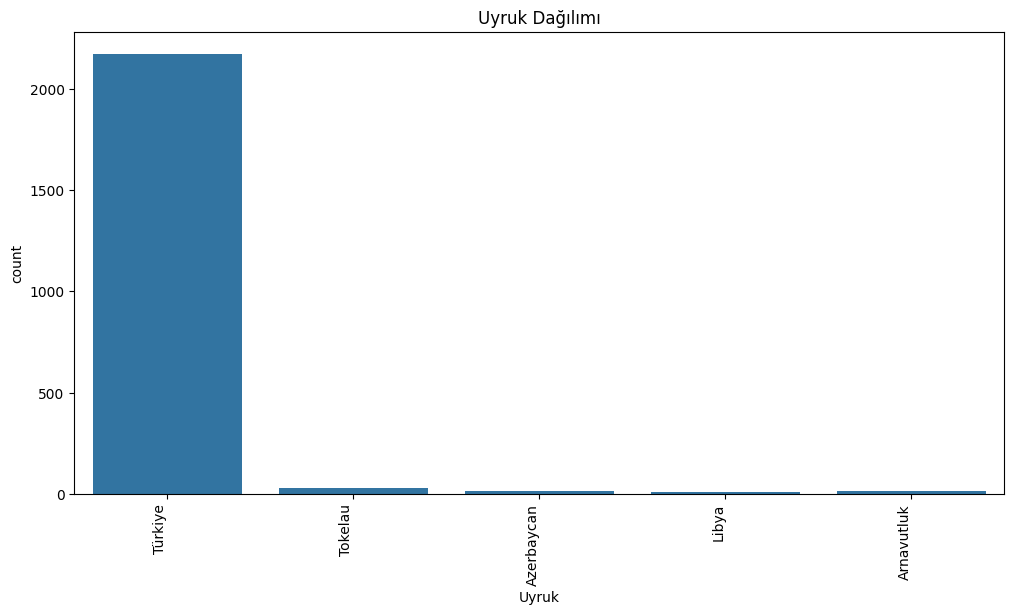

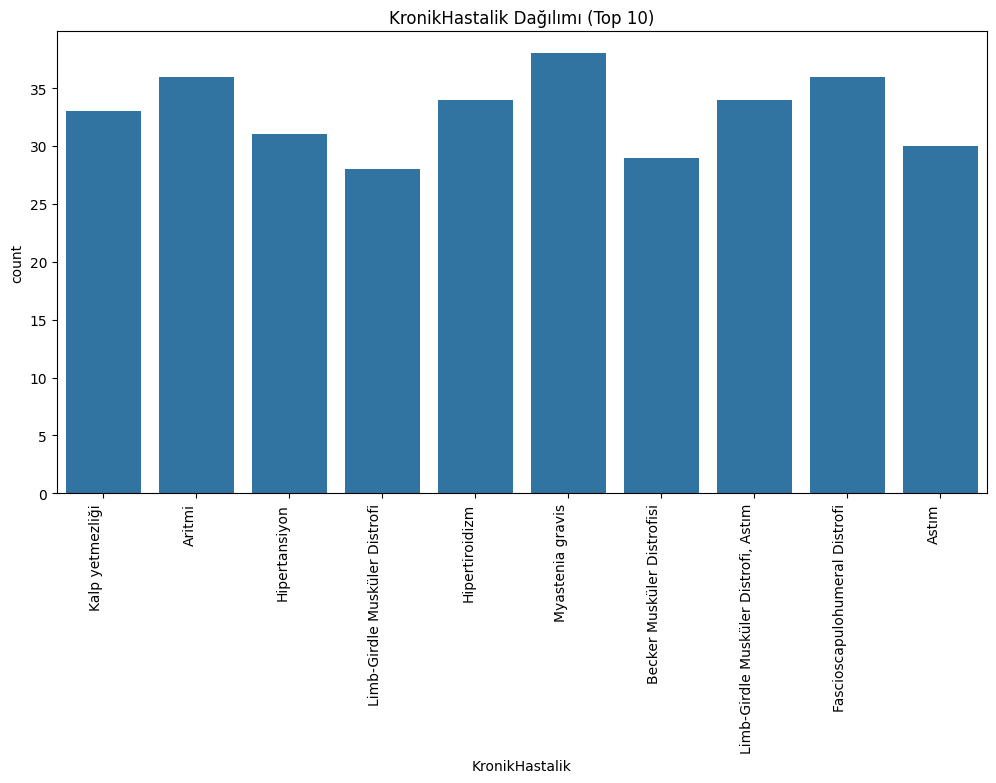

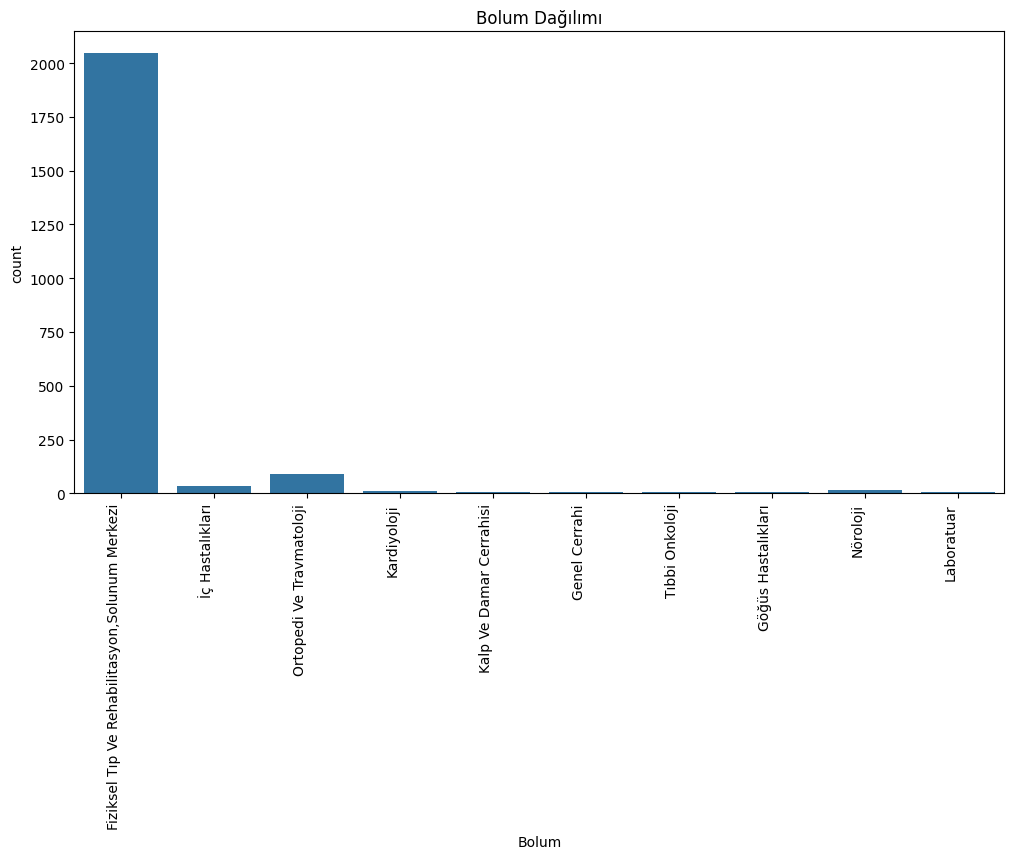

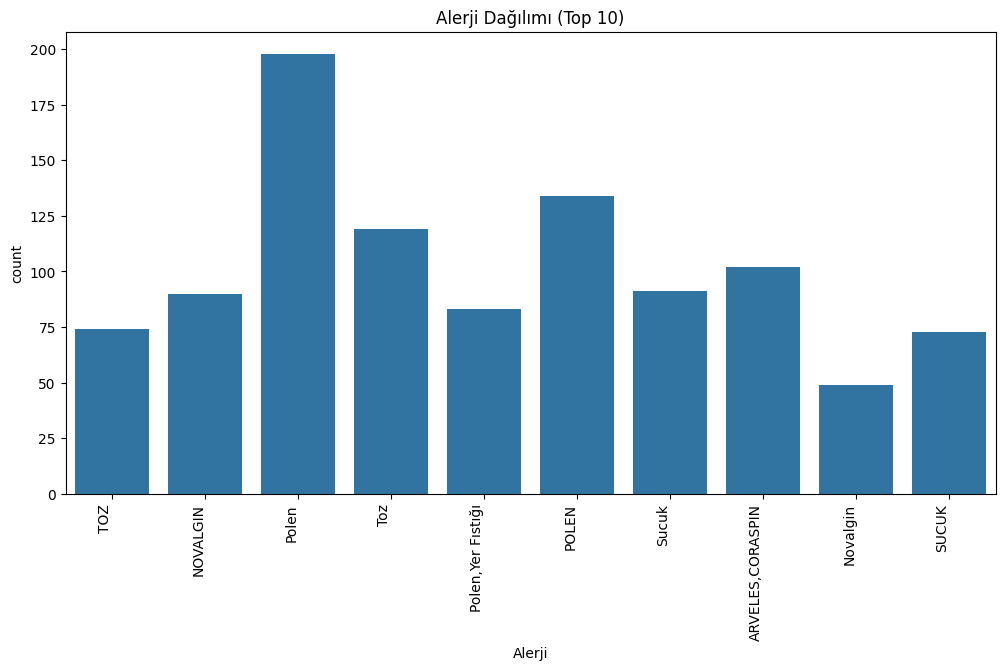

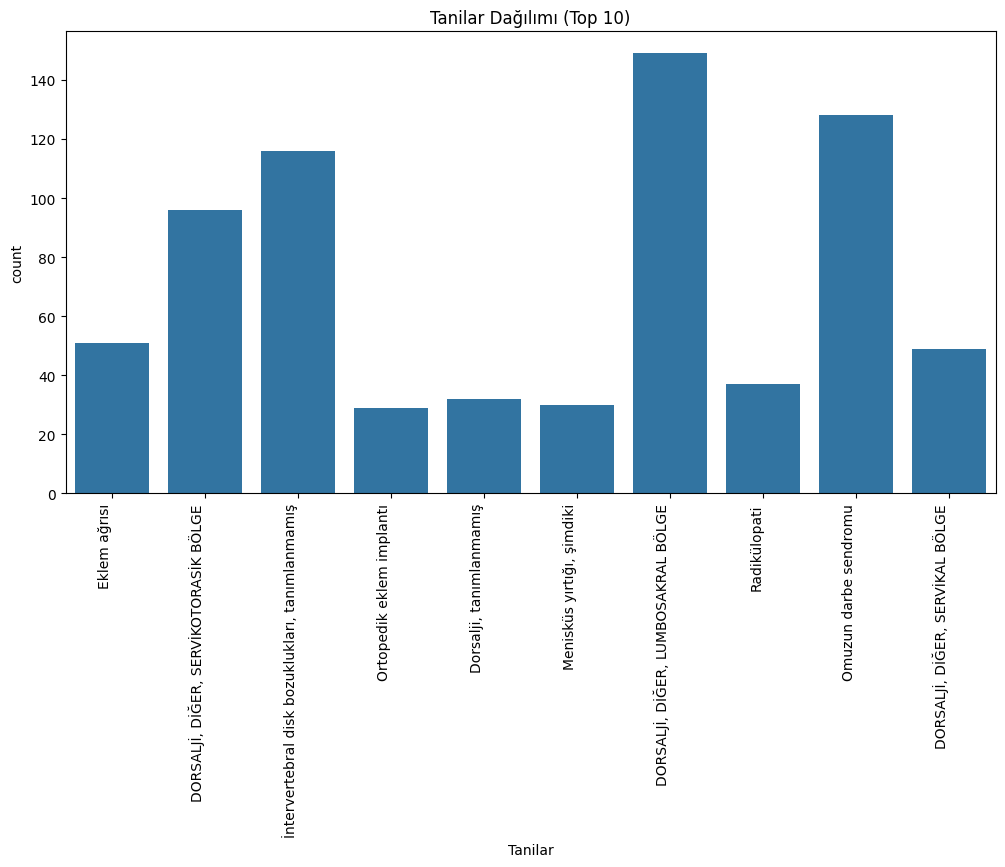

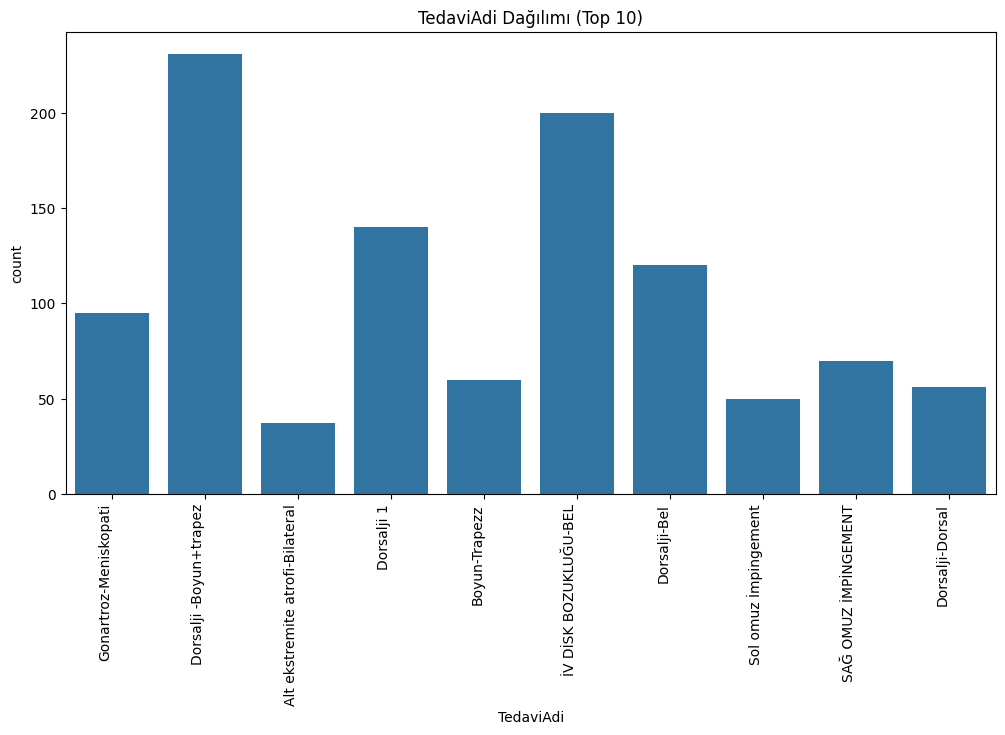

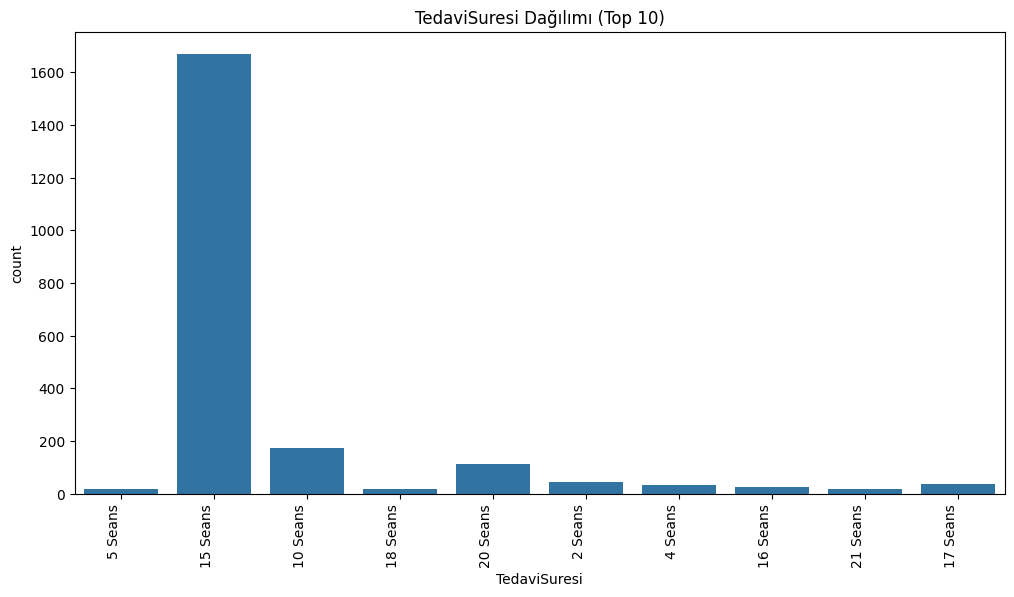

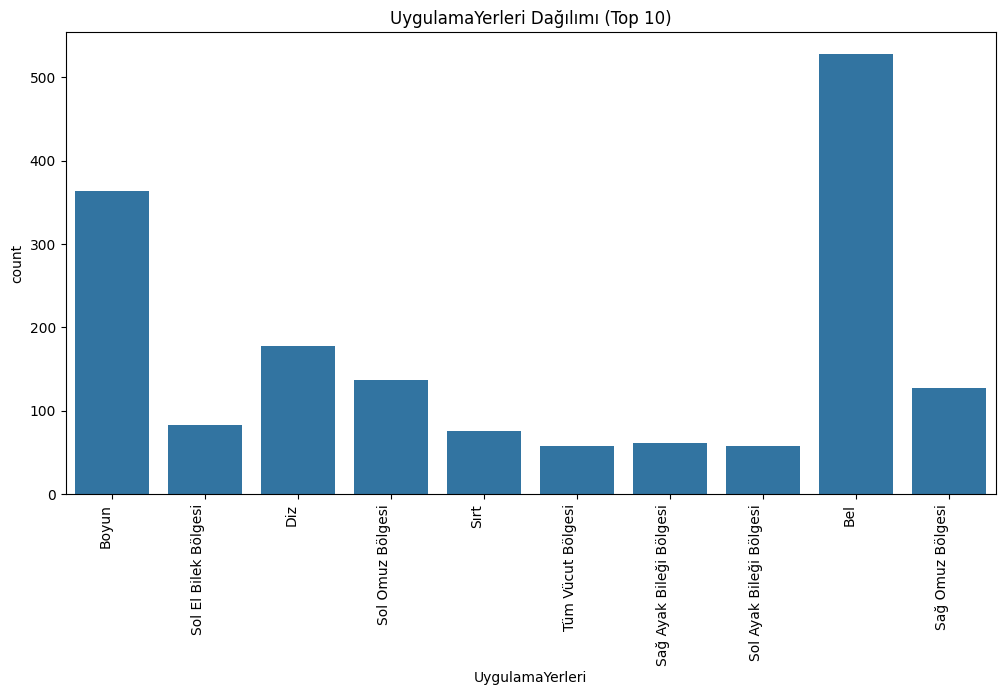

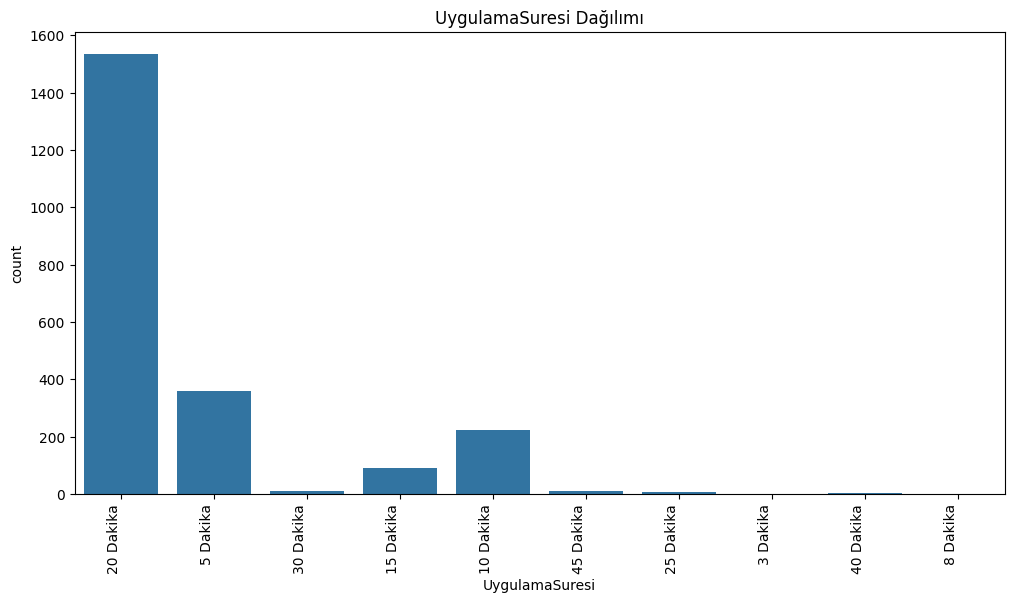


===== 4️⃣ Hedef Değişken (TedaviSuresi) ile Kategorik Değişkenler =====


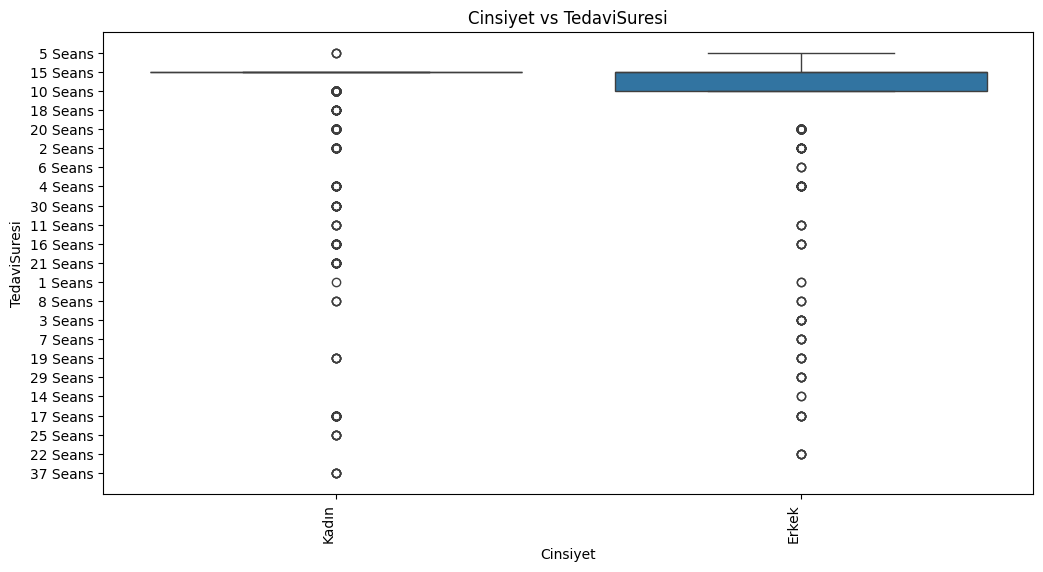

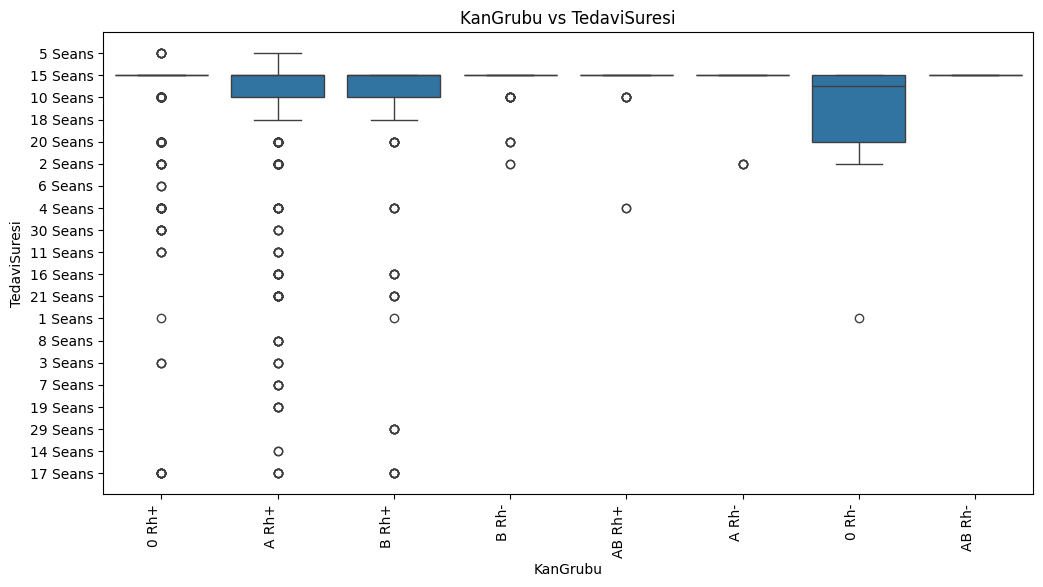

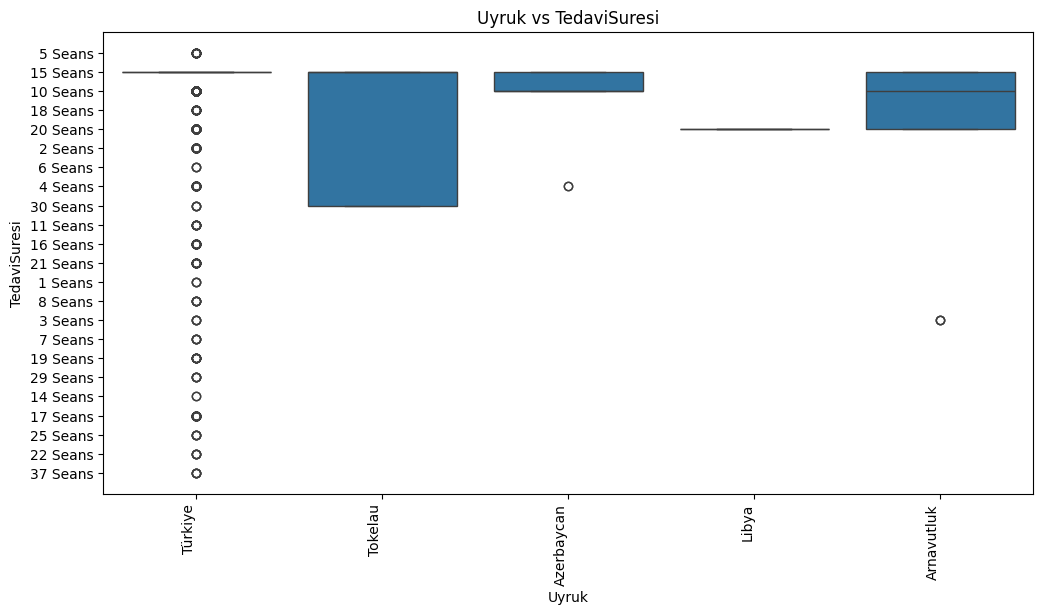

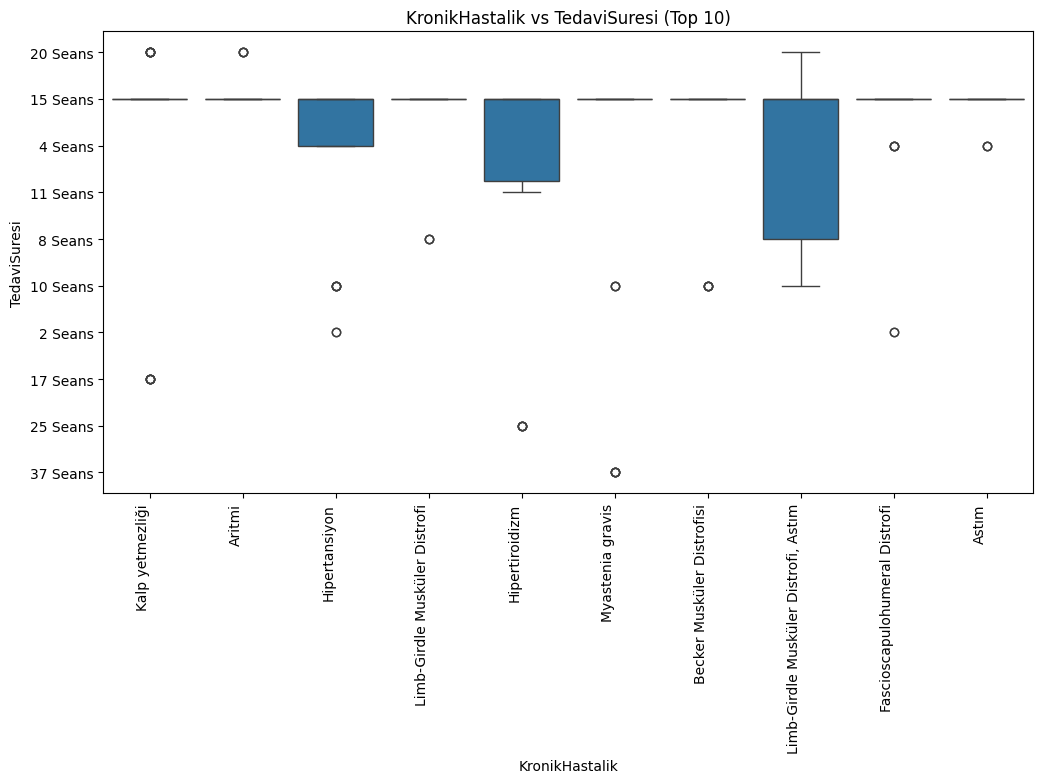

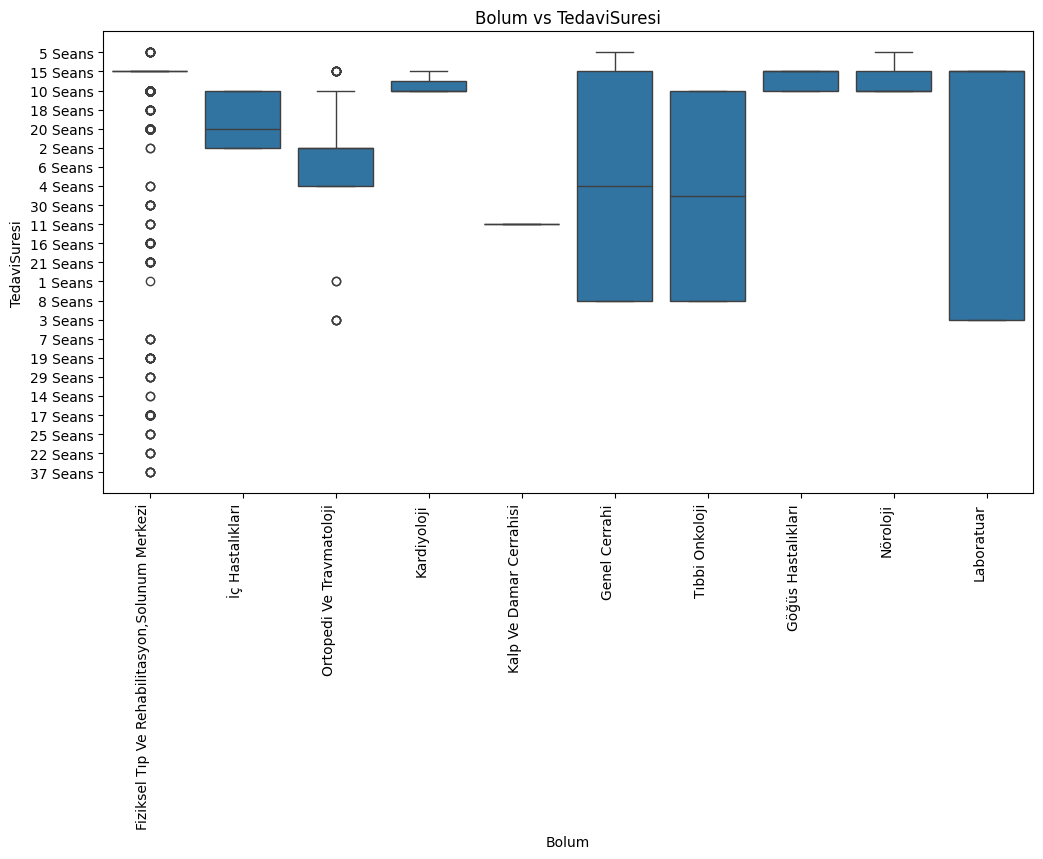

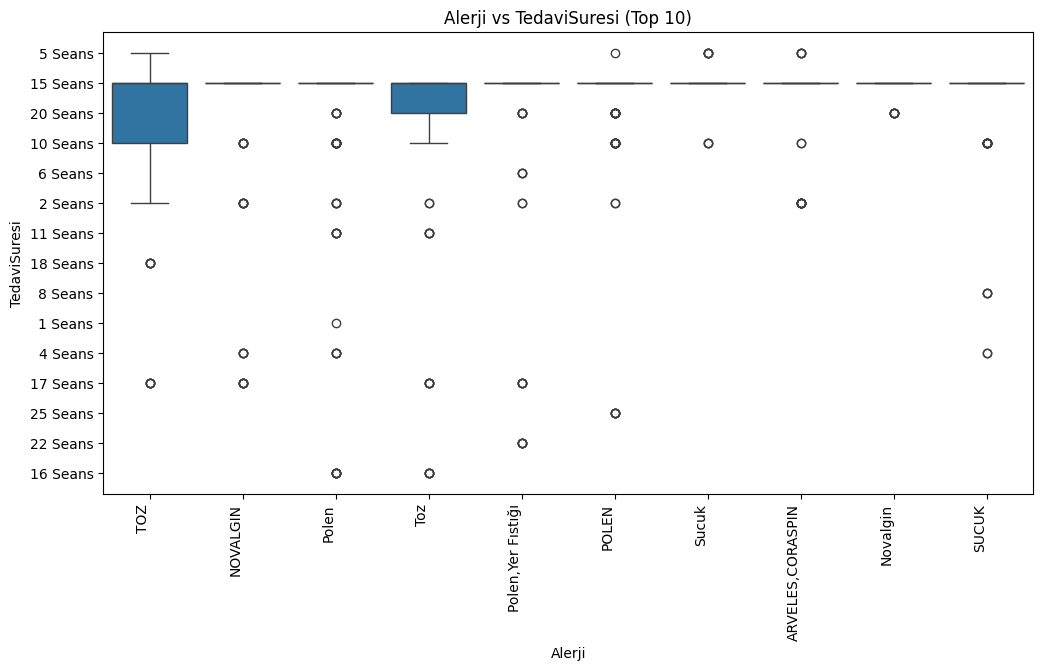

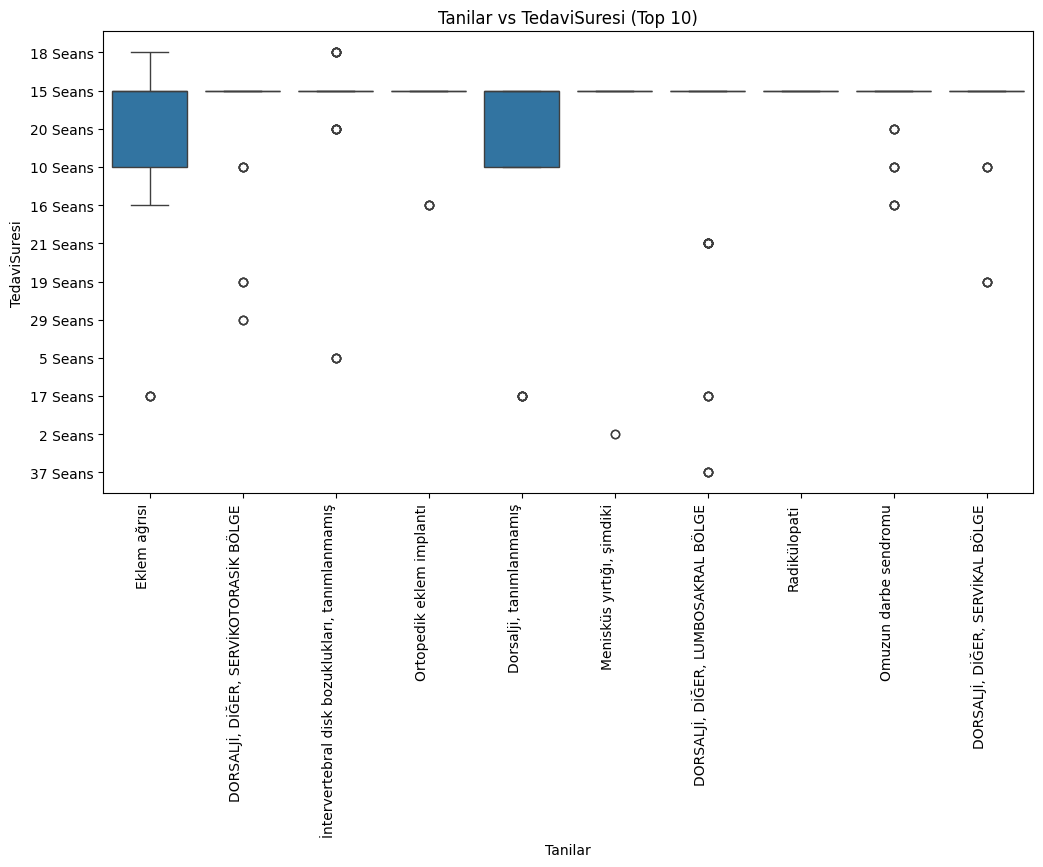

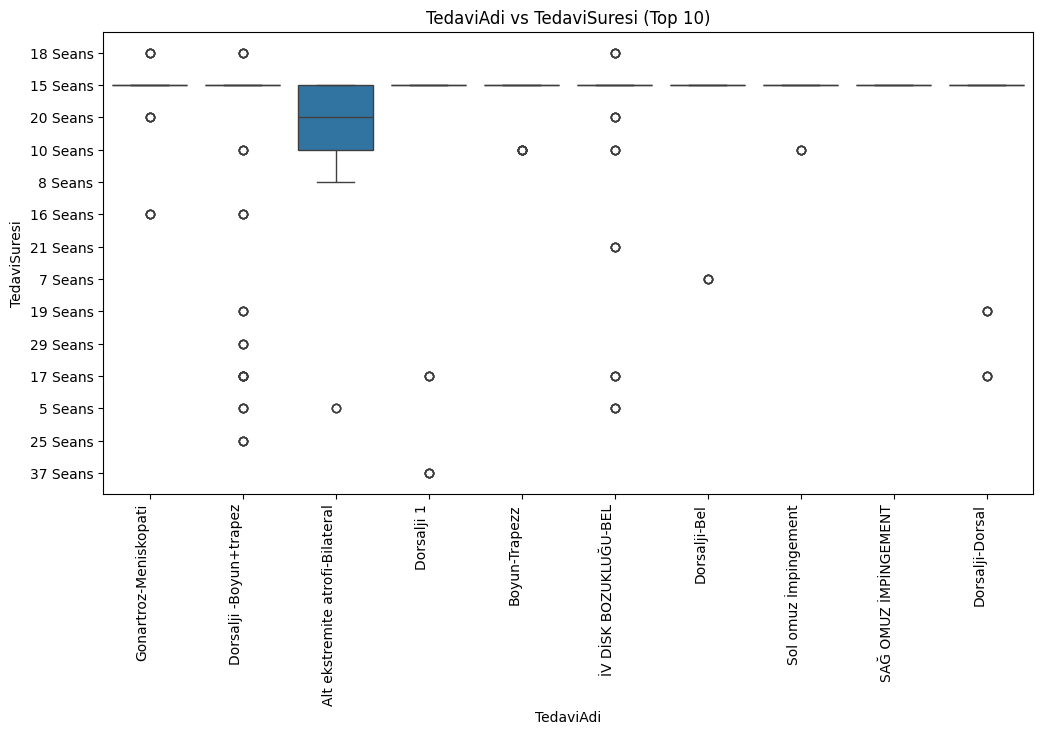

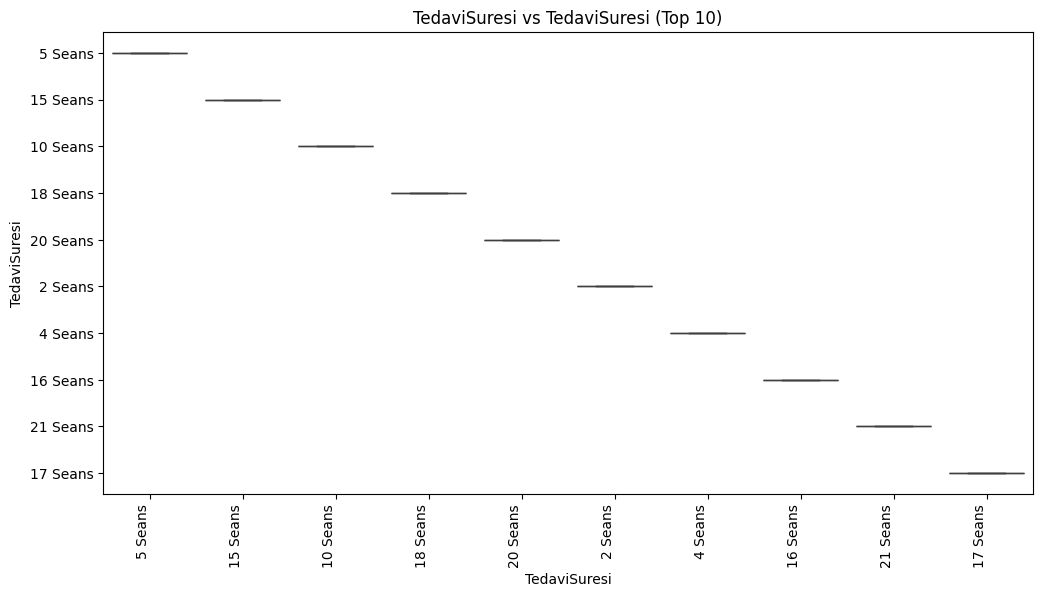

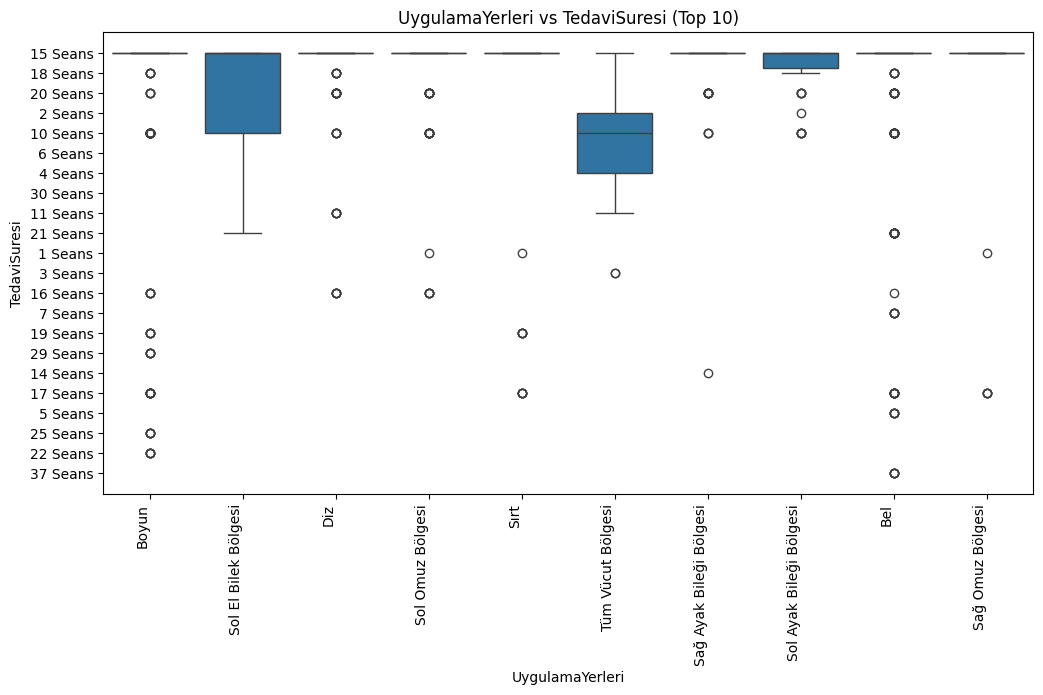

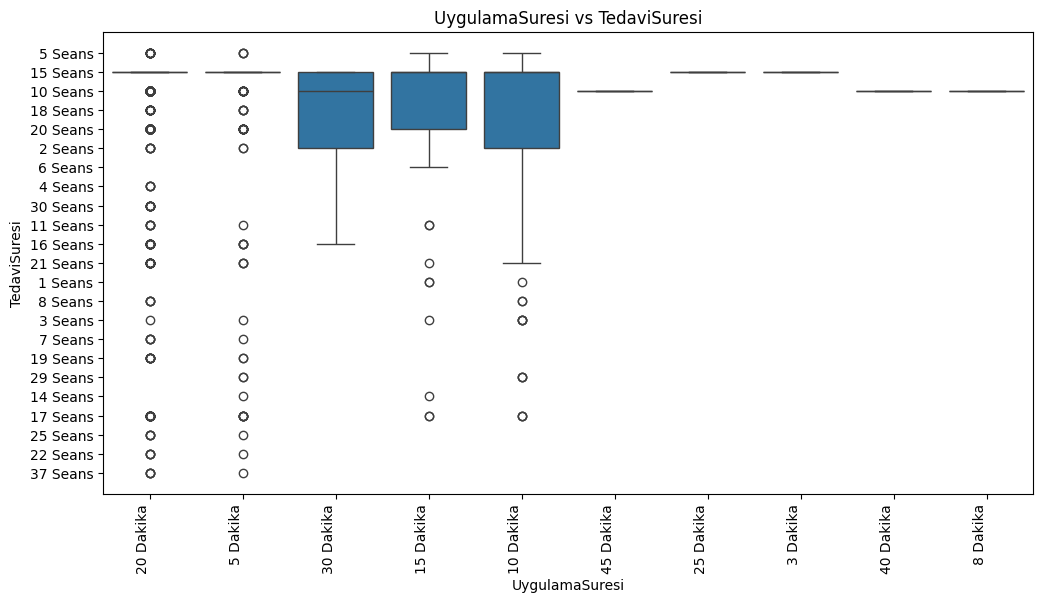


===== 5️⃣ Sayısal Değişkenler Korelasyon Matrisi =====


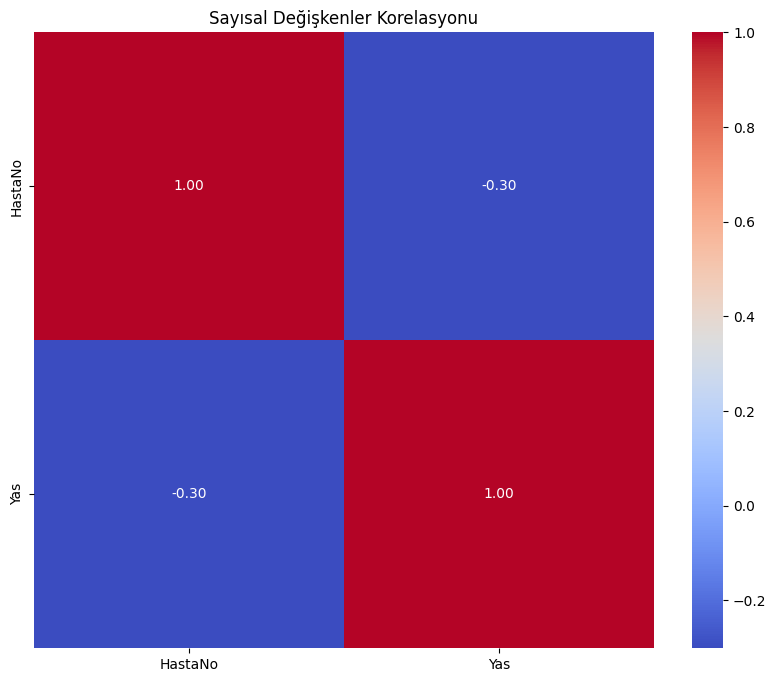

In [2]:
# =====================================
# AŞAMA 2: GÖRSEL ANALİZ
# =====================================

import seaborn as sns
import matplotlib.pyplot as plt

print("="*50)
print("2️⃣ AŞAMA 2 – GÖRSEL ANALİZ (OKUNAKLI GRAFİKLER)")
print("="*50)

# -------------------------------
# 1️⃣ Sayısal Değişkenlerin Dağılımları (Histogram)
# -------------------------------
print("\n===== 1️⃣ Sayısal Değişkenlerin Dağılımları =====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    df[col].hist(bins=30)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

# -------------------------------
# 2️⃣ Aykırı Değerler (Boxplot)
# -------------------------------
print("\n===== 2️⃣ Sayısal Değişkenlerde Boxplot =====")
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

# -------------------------------
# 3️⃣ Kategorik Değişken Dağılımları (Barplot)
# -------------------------------
print("\n===== 3️⃣ Kategorik Değişken Dağılımları =====")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12,6))

    # Eğer kategori sayısı çoksa, sadece top 10 göster
    if df[col].nunique() > 15:
        top_categories = df[col].value_counts().nlargest(10).index
        sns.countplot(x=col, data=df[df[col].isin(top_categories)])
        plt.title(f"{col} Dağılımı (Top 10)")
    else:
        sns.countplot(x=col, data=df)
        plt.title(f"{col} Dağılımı")

    plt.xticks(rotation=90, ha='right')
    plt.show()

# -------------------------------
# 4️⃣ Hedef Değişken ile Kategorik İlişkiler (Boxplot)
# -------------------------------
print("\n===== 4️⃣ Hedef Değişken (TedaviSuresi) ile Kategorik Değişkenler =====")
for col in categorical_cols:
    plt.figure(figsize=(12,6))

    # Eğer kategori sayısı çoksa top 10
    if df[col].nunique() > 15:
        top_categories = df[col].value_counts().nlargest(10).index
        sns.boxplot(x=col, y="TedaviSuresi", data=df[df[col].isin(top_categories)])
        plt.title(f"{col} vs TedaviSuresi (Top 10)")
    else:
        sns.boxplot(x=col, y="TedaviSuresi", data=df)
        plt.title(f"{col} vs TedaviSuresi")

    plt.xticks(rotation=90, ha='right')
    plt.show()

# -------------------------------
# 5️⃣ Sayısal Değişkenler Korelasyon Matrisi (Heatmap)
# -------------------------------
print("\n===== 5️⃣ Sayısal Değişkenler Korelasyon Matrisi =====")
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyonu")
plt.show()




# Preprocessing

In [3]:
# =====================================
# AŞAMA 3: VERİ ÖN İŞLEME
# =====================================

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

def preprocess(df):
    """
    Tüm veri ön işleme adımlarını (sayısala çevirme, eksik doldurma,
    metin feature engineering, encoding, aykırı değer düzeltme, scaling, NLP)
    adım adım print ile gösterir.
    """
    print("="*50)
    print("3️⃣ AŞAMA 3 – VERİ ÖN İŞLEME (EXPLANATORY)")
    print("="*50)

    # -------------------------------
    # 1️⃣ TedaviSuresi ve UygulamaSuresi sayısala çevir
    print("\n===== 1️⃣ TedaviSuresi ve UygulamaSuresi sayısala çeviriliyor =====")
    df['TedaviSuresi'] = df['TedaviSuresi'].astype(str).str.extract(r'(\d+)').astype(float)
    df['UygulamaSuresi'] = df['UygulamaSuresi'].astype(str).str.extract(r'(\d+)').astype(float)
    print("Örnek dönüştürme:\n", df[['TedaviSuresi','UygulamaSuresi']].head())

    # -------------------------------
    # 2️⃣ Eksik değerleri doldur
    print("\n===== 2️⃣ Eksik Değerleri Doldurma =====")
    cat_imputer_freq = ['Cinsiyet','Bolum','Uyruk','KanGrubu']
    cat_imputer_empty = ['Alerji','KronikHastalik','Tanilar']

    freq_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_imputer_freq] = freq_imputer.fit_transform(df[cat_imputer_freq])

    for col in cat_imputer_empty:
        df[col] = df[col].fillna('Yok')

    print("Eksik değerler dolduruldu. Örnek:\n", df[cat_imputer_freq + cat_imputer_empty].head())

    # -------------------------------
    # 3️⃣ Metin Değişkenlerden Feature Mühendisliği
    print("\n===== 3️⃣ Metin değişkenlerden yeni sayısal özellikler =====")
    df['KronikHastalik_sayisi'] = df['KronikHastalik'].apply(lambda x: len(str(x).split(',')) if x!='Yok' else 0)
    df['Alerji_sayisi'] = df['Alerji'].apply(lambda x: len(str(x).split(',')) if x!='Yok' else 0)
    df['Tanilar_sayisi'] = df['Tanilar'].apply(lambda x: len(str(x).split(',')) if x!='Yok' else 0)
    print("Örnek yeni özellikler:\n", df[['KronikHastalik_sayisi','Alerji_sayisi','Tanilar_sayisi']].head())

    # ✅ EKLENDİ: NLP tabanlı kelime sıklığı (CountVectorizer)
    print("\n===== 🆕 NLP Feature Engineering: Tanılar ve KronikHastalık Kelime Sıklığı =====")

    # Tanılar için en sık 10 kelime
    vectorizer_tanilar = CountVectorizer(max_features=10)
    X_tanilar = vectorizer_tanilar.fit_transform(df['Tanilar'].astype(str)).toarray()
    tanilar_df = pd.DataFrame(X_tanilar, columns=[f"tanilar_{w}" for w in vectorizer_tanilar.get_feature_names_out()])

    # Kronik hastalık için en sık 10 kelime
    vectorizer_kronik = CountVectorizer(max_features=10)
    X_kronik = vectorizer_kronik.fit_transform(df['KronikHastalik'].astype(str)).toarray()
    kronik_df = pd.DataFrame(X_kronik, columns=[f"kronik_{w}" for w in vectorizer_kronik.get_feature_names_out()])

    # Orijinal dataframe ile birleştir
    df = pd.concat([df.reset_index(drop=True), tanilar_df, kronik_df], axis=1)

    print("En sık geçen Tanılar kelimeleri:", vectorizer_tanilar.get_feature_names_out())
    print("En sık geçen KronikHastalık kelimeleri:", vectorizer_kronik.get_feature_names_out())
    print("Yeni NLP özelliklerinden örnek:\n", df[[*tanilar_df.columns, *kronik_df.columns]].head())

    # -------------------------------
    # 4️⃣ Kategorik Değişkenleri OneHotEncode et
    print("\n===== 4️⃣ Kategorik Değişkenler OneHotEncoder ile encode ediliyor =====")
    ohe_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum',
                'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']

    ohe = OneHotEncoder(sparse_output=False, drop=None)
    df_ohe = pd.DataFrame(ohe.fit_transform(df[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
    df = df.drop(columns=ohe_cols)
    df = pd.concat([df, df_ohe], axis=1)
    print("Örnek encode edilmiş sütunlar:\n", df_ohe.head())

    # -------------------------------
    # 5️⃣ Aykırı Değer Analizi ve Düzeltme (IQR Yöntemi)
    print("\n===== 5️⃣ Aykırı Değer Analizi ve Düzeltme (IQR) =====")
    outlier_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi']

    def iqr_bounds(series, k=1.5):
        Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
        IQR = Q3 - Q1
        return Q1 - k*IQR, Q3 + k*IQR

    for col in outlier_cols:
        lower, upper = iqr_bounds(df[col])
        n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"{col}: {n_outliers} aykırı değer bulundu (alt={lower:.2f}, üst={upper:.2f})")
        df[col] = df[col].clip(lower, upper)
    print("\n✅ Aykırı değerler Winsorize (clip) yöntemiyle sınırlar içine çekildi.")

    # -------------------------------
    # 6️⃣ Sayısal Değişkenleri StandardScaler ile standartlaştır
    print("\n===== 6️⃣ Sayısal Değişkenler StandardScaler ile ölçekleniyor =====")
    scaler_cols = ['Yas','TedaviSuresi','UygulamaSuresi',
                   'KronikHastalik_sayisi','Alerji_sayisi','Tanilar_sayisi']
    scaler = StandardScaler()
    df[scaler_cols] = scaler.fit_transform(df[scaler_cols])
    print("Ölçeklenmiş sayısal örnek:\n", df[scaler_cols].head())

    # -------------------------------
    # 7️⃣ Son Kontrol
    print("\n===== 7️⃣ Veri Ön İşleme Sonrası Özet =====")
    print(df.head())
    print("\nVeri boyutu:", df.shape)
    print("Eksik değer kontrolü:\n", df.isnull().sum())

    return df


# Tüm ön işleme adımlarını çalıştır
df = preprocess(df)


3️⃣ AŞAMA 3 – VERİ ÖN İŞLEME (EXPLANATORY)

===== 1️⃣ TedaviSuresi ve UygulamaSuresi sayısala çeviriliyor =====
Örnek dönüştürme:
    TedaviSuresi  UygulamaSuresi
0           5.0            20.0
1          15.0            20.0
2          15.0            20.0
3          15.0             5.0
4          15.0            20.0

===== 2️⃣ Eksik Değerleri Doldurma =====
Eksik değerler dolduruldu. Örnek:
   Cinsiyet                                           Bolum    Uyruk KanGrubu  \
0    Kadın  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  Türkiye    0 Rh+   
1    Erkek  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  Türkiye    0 Rh+   
2    Erkek  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  Türkiye    0 Rh+   
3    Erkek  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  Türkiye    0 Rh+   
4    Erkek  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  Türkiye    0 Rh+   

  Alerji                                     KronikHastalik  \
0    TOZ  Becker Musküler Distrofisi, Hiportiroidizm, Ka

# Ön İşleme Sonrası Veri Görselleştirme (EDA)

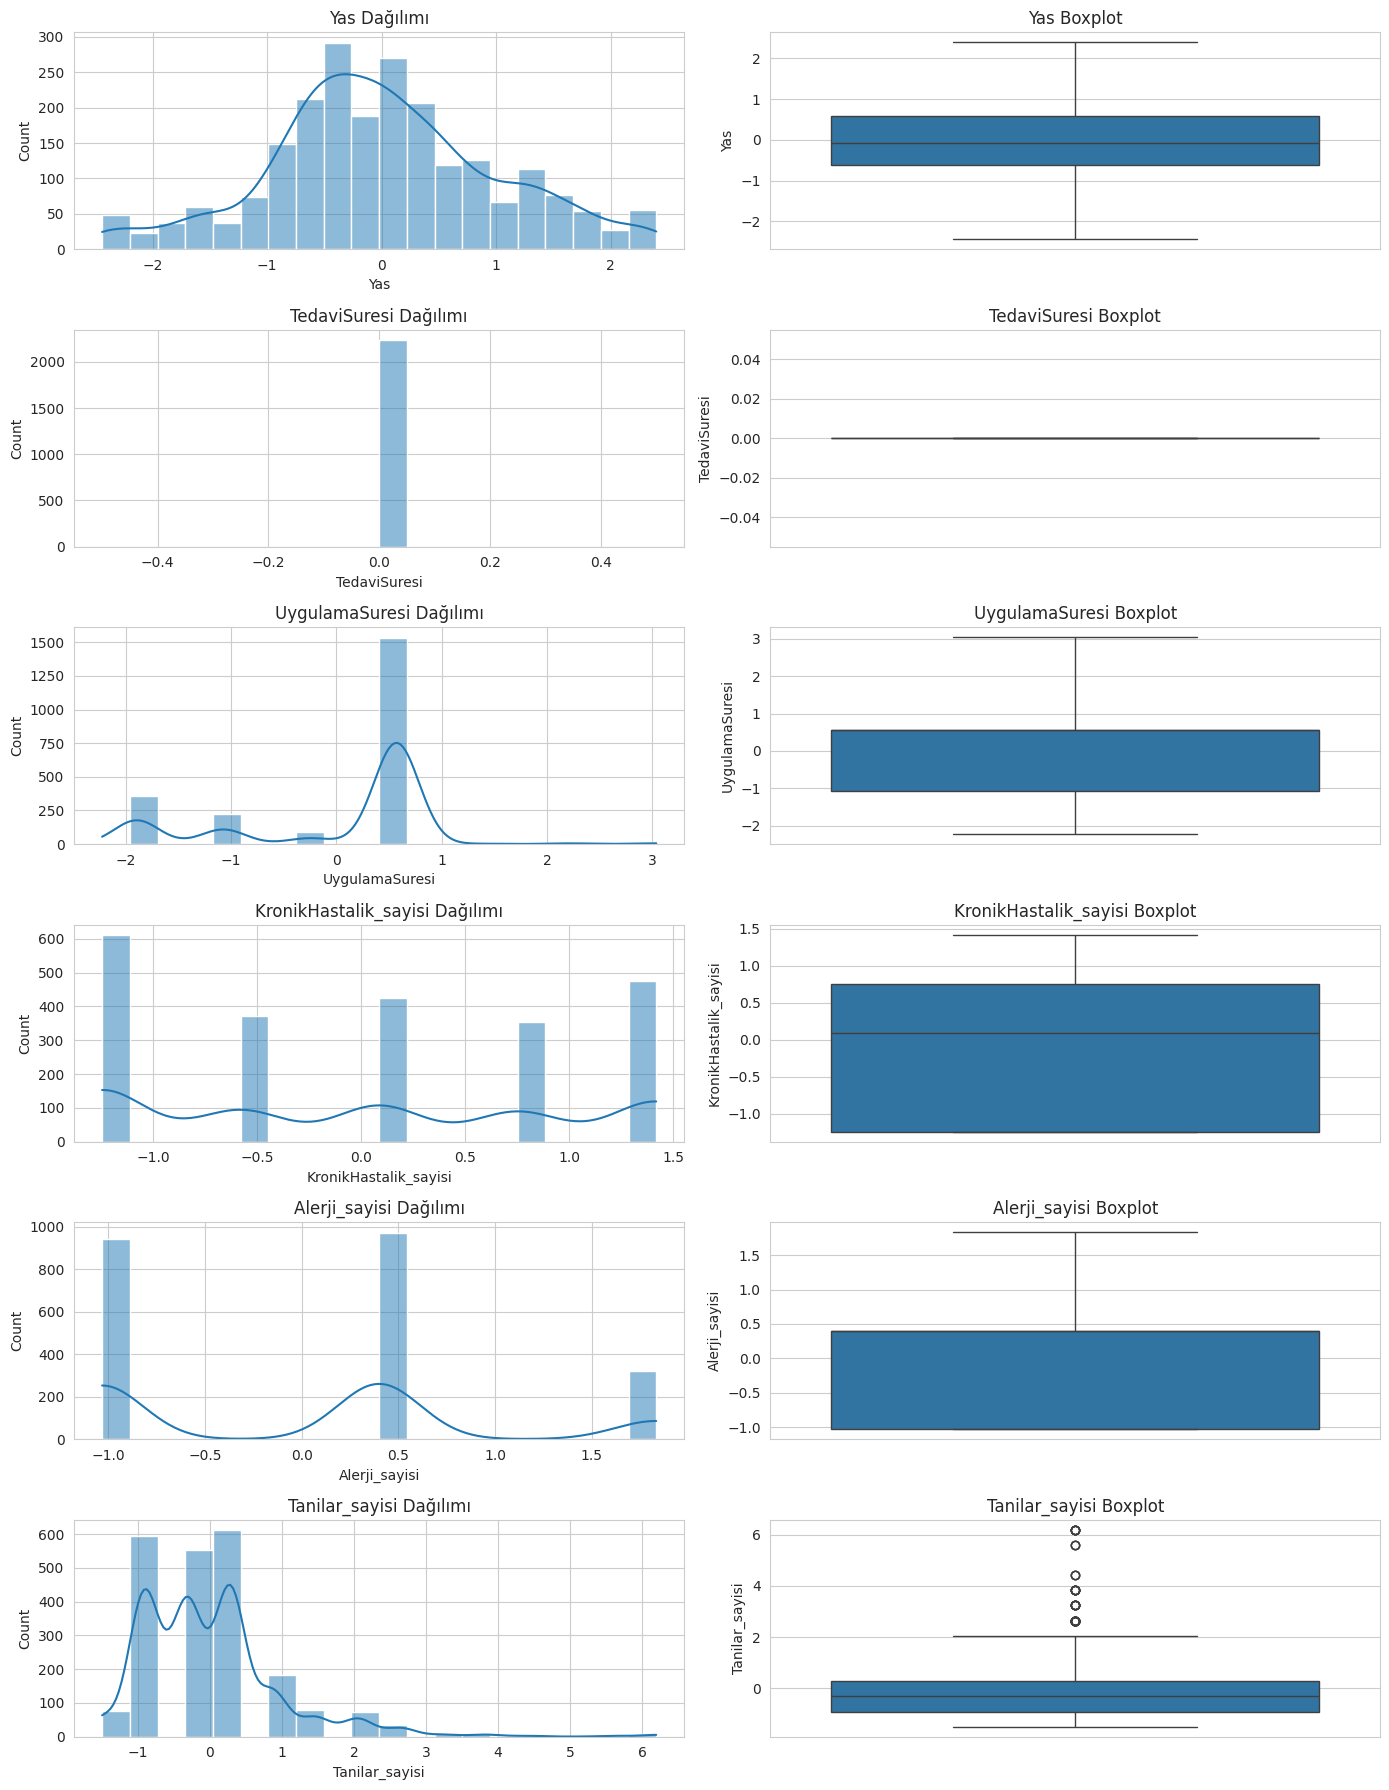


✅ Histogram ve boxplotlar: Sayısal değişkenlerin dağılımını ve olası aykırı değerleri gösterir.



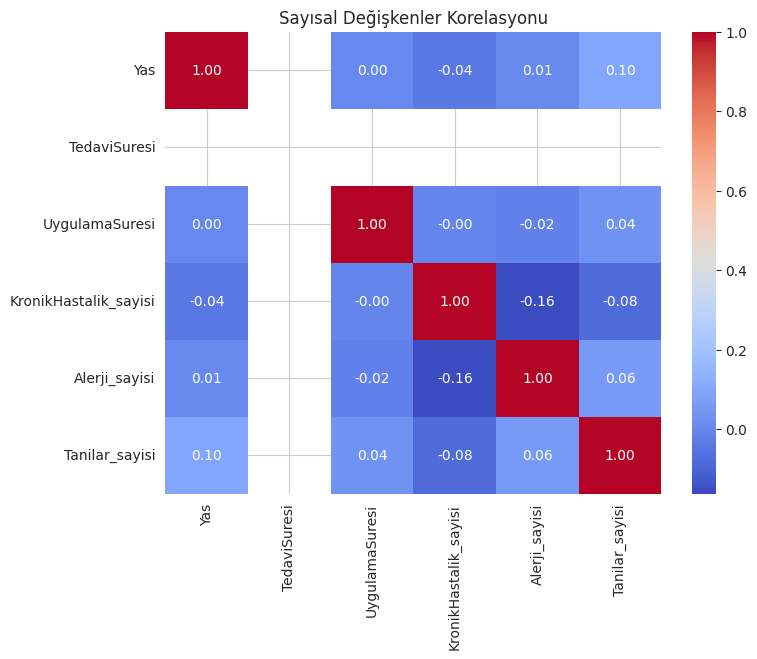


✅ Korelasyon heatmap: Hangi sayısal değişkenler TedaviSuresi ile daha ilişkili, kolayca görülebilir.



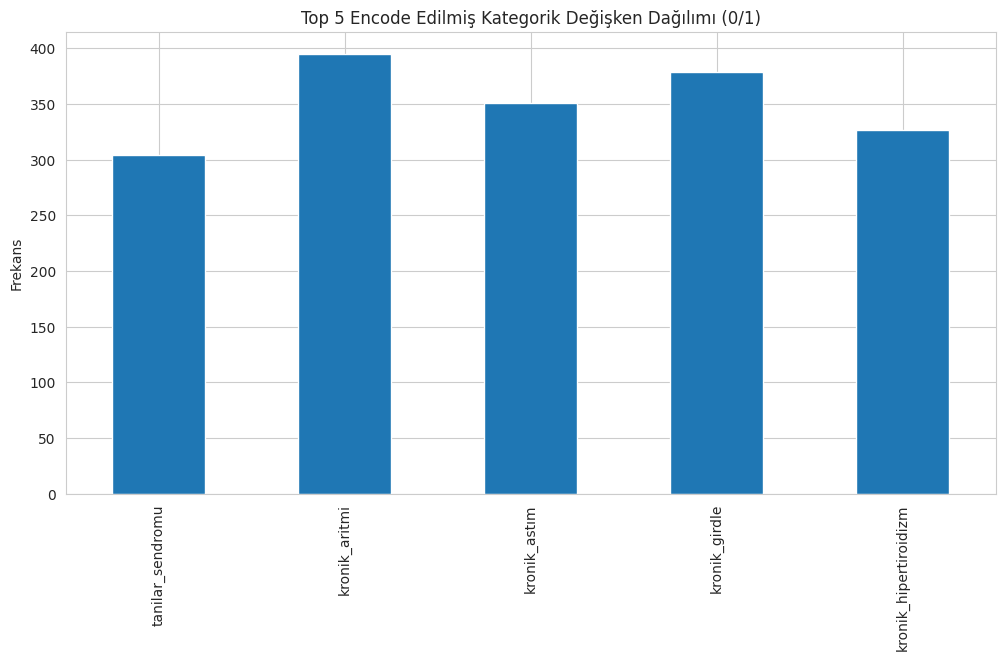


✅ Encode edilmiş kategorik değişkenler: Hangi kategorinin daha sık olduğunu gösterir.



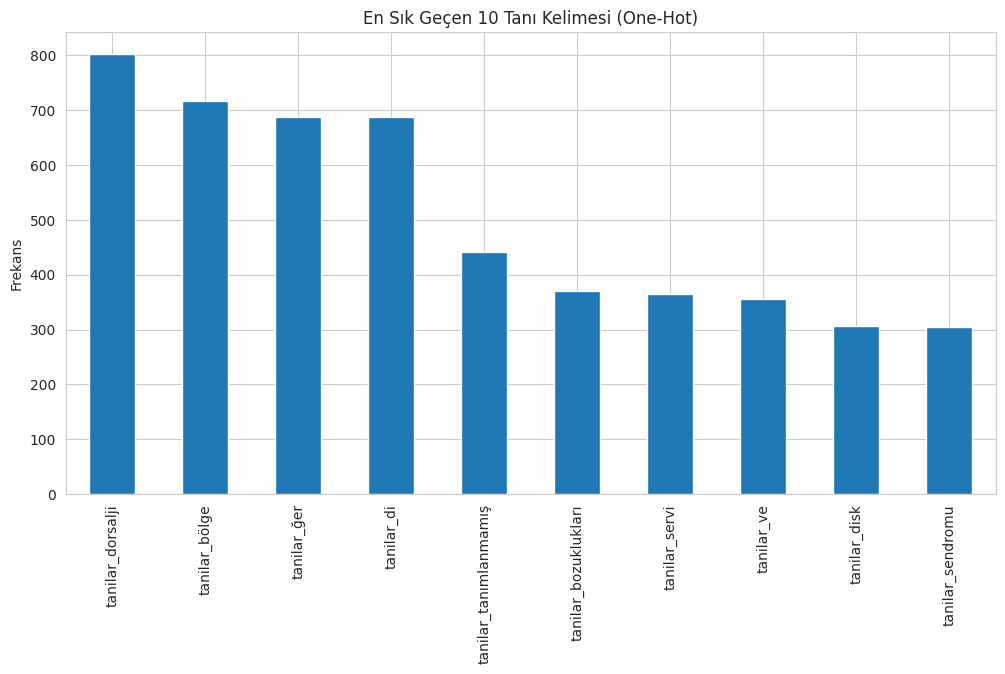

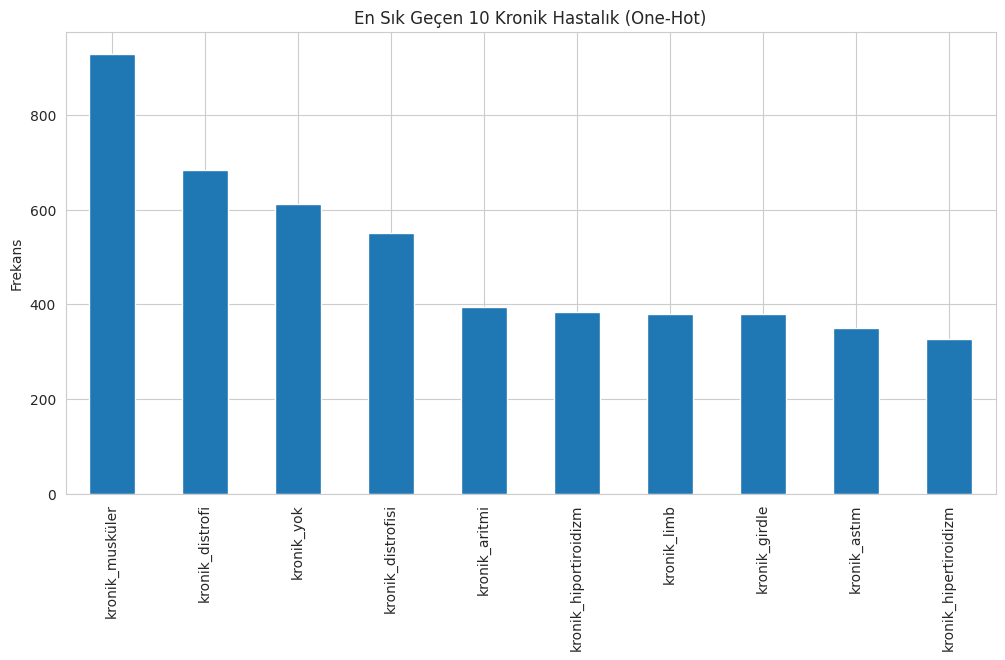


✅ NLP özetleri: En sık geçen tanılar ve kronik hastalıklar görselleştirildi.



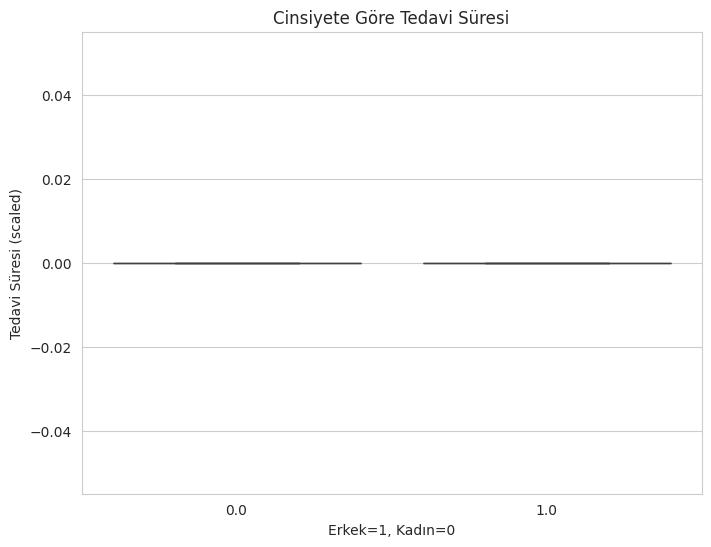

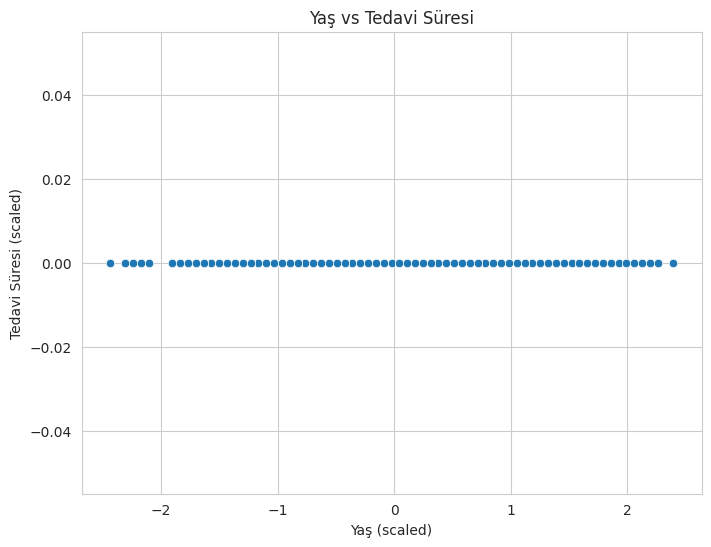


✅ Tedavi Süresi ile ilişkili analizler: Cinsiyet ve yaşa göre farklar gözlendi.



In [4]:
# =====================================
# Ön İşleme Sonrası Genişletilmiş EDA
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -----------------------------
# 1️⃣ Sayısal değişkenlerin histogram + boxplot
numeric_cols = ['Yas', 'TedaviSuresi', 'UygulamaSuresi',
                'KronikHastalik_sayisi', 'Alerji_sayisi', 'Tanilar_sayisi']

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i,0])
    axes[i,0].set_title(f"{col} Dağılımı")
    axes[i,0].set_xlabel(col)

    sns.boxplot(y=df[col], ax=axes[i,1])
    axes[i,1].set_title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

print("\n✅ Histogram ve boxplotlar: Sayısal değişkenlerin dağılımını ve olası aykırı değerleri gösterir.\n")

# -----------------------------
# 2️⃣ Korelasyon heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyonu")
plt.show()
print("\n✅ Korelasyon heatmap: Hangi sayısal değişkenler TedaviSuresi ile daha ilişkili, kolayca görülebilir.\n")

# -----------------------------
# 3️⃣ Encode edilmiş kategorik değişkenlerin özet barplot (top 5)
encoded_categorical_cols = [col for col in df.columns if '_' in col and df[col].nunique() == 2]
top_cols = encoded_categorical_cols[:5]  # İlk 5 sütunu göster

df[top_cols].sum().plot(kind='bar')
plt.title("Top 5 Encode Edilmiş Kategorik Değişken Dağılımı (0/1)")
plt.ylabel("Frekans")
plt.show()
print("\n✅ Encode edilmiş kategorik değişkenler: Hangi kategorinin daha sık olduğunu gösterir.\n")

# -----------------------------
# 4️⃣ NLP Feature Engineering özetleri (en sık kelimeler)
nlp_cols_tanilar = [col for col in df.columns if col.startswith("tanilar_")]
nlp_cols_kronik = [col for col in df.columns if col.startswith("kronik_")]

# En sık geçen 10 tanı kelimesi
df[nlp_cols_tanilar].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("En Sık Geçen 10 Tanı Kelimesi (One-Hot)")
plt.ylabel("Frekans")
plt.show()

# En sık geçen 10 kronik hastalık
df[nlp_cols_kronik].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("En Sık Geçen 10 Kronik Hastalık (One-Hot)")
plt.ylabel("Frekans")
plt.show()

print("\n✅ NLP özetleri: En sık geçen tanılar ve kronik hastalıklar görselleştirildi.\n")

# -----------------------------
# 5️⃣ Tedavi Süresi ile ilişkili görselleştirmeler
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Cinsiyet_Erkek'], y=df['TedaviSuresi'])
plt.title("Cinsiyete Göre Tedavi Süresi")
plt.xlabel("Erkek=1, Kadın=0")
plt.ylabel("Tedavi Süresi (scaled)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Yas'], y=df['TedaviSuresi'])
plt.title("Yaş vs Tedavi Süresi")
plt.xlabel("Yaş (scaled)")
plt.ylabel("Tedavi Süresi (scaled)")
plt.show()

print("\n✅ Tedavi Süresi ile ilişkili analizler: Cinsiyet ve yaşa göre farklar gözlendi.\n")
